<a href="https://colab.research.google.com/github/nochwysid/CSE5008-SP/blob/main/3_SciProg_Numpy_info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

%%timeit, list comp in arrays, arrays in list comp, broadcasting, matrix creation, squeeze, combining operations,  
@ (matmul operator), 

In [ ]:
import numpy as np

## Numpy

Main object type is `np.array`

Many ways to create it,

One way is to convert a python list

In [ ]:
python_list = [ 1,2,3 ]
np.array(python_list)

array([1, 2, 3])

In [ ]:
arr = np.array([1,2,3])
arr

array([1, 2, 3])

Many times a list comprehension is used to create a list and then converted to a array

In [ ]:
arr = np.array([ 2**i for i in [2,3,9] ])
arr

array([  4,   8, 512])

In [ ]:
arr = np.array([ 2**i for i in range(10) if i!= 5 ])
arr

array([  1,   2,   4,   8,  16,  64, 128, 256, 512])

### Exercise
Create a numpy array that contain  intergers i  such that  0<i<100 and $2^i$ has the last digit 6

In [ ]:
np.array([ i for i in range(1,100) if (2**i)%10 == 6])

array([ 4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68,
       72, 76, 80, 84, 88, 92, 96])

Create a 2D numpy array $A$ such that $A_{ij} = i\times j$

In [ ]:
np.array([[i*j for i in range(10)] for j in range(10)])[7,9]

63

## Vectorization

In [ ]:
def fn(x):
    return x*x + 4*x +5

In [ ]:
[fn(i) for i in range(20)]

[5,
 10,
 17,
 26,
 37,
 50,
 65,
 82,
 101,
 122,
 145,
 170,
 197,
 226,
 257,
 290,
 325,
 362,
 401,
 442]

In [ ]:
test_list = [i for i in range(20)]
[fn(i) for i in test_list]

[5,
 10,
 17,
 26,
 37,
 50,
 65,
 82,
 101,
 122,
 145,
 170,
 197,
 226,
 257,
 290,
 325,
 362,
 401,
 442]

In [ ]:
np_test_list = np.arange(100)
fn(np_test_list)

array([    5,    10,    17,    26,    37,    50,    65,    82,   101,
         122,   145,   170,   197,   226,   257,   290,   325,   362,
         401,   442,   485,   530,   577,   626,   677,   730,   785,
         842,   901,   962,  1025,  1090,  1157,  1226,  1297,  1370,
        1445,  1522,  1601,  1682,  1765,  1850,  1937,  2026,  2117,
        2210,  2305,  2402,  2501,  2602,  2705,  2810,  2917,  3026,
        3137,  3250,  3365,  3482,  3601,  3722,  3845,  3970,  4097,
        4226,  4357,  4490,  4625,  4762,  4901,  5042,  5185,  5330,
        5477,  5626,  5777,  5930,  6085,  6242,  6401,  6562,  6725,
        6890,  7057,  7226,  7397,  7570,  7745,  7922,  8101,  8282,
        8465,  8650,  8837,  9026,  9217,  9410,  9605,  9802, 10001,
       10202])

In [ ]:
%%timeit
x = np.linspace(0,1,10000)
for i in range(10000):
    x[i] = fn(x[i])


100 loops, best of 5: 7.89 ms per loop


In [ ]:
%%timeit
x = np.linspace(0,1,10000)
fn(x)

The slowest run took 11.39 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 113 µs per loop


### Exercise
Create an array of first 10 powers of 2

In [ ]:
2**np.arange(10)

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

## Another way to create a numpy array is with initializing functions

- np.zeros
- np.ones
- np.arange

These functions along with `reshape` can be used to create initial matrix without any for loops

In [ ]:
np.zeros((10,10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
5*np.ones((10,10))

array([[5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]])

In [ ]:
np.arange(2,10, 2) #equivalent to range(2,10,2)

array([2, 4, 6, 8])

You can combine these functions with arithmetic operations

In [ ]:
np.zeros((10,10)) + 5

array([[5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]])

In [ ]:
np.ones((10,10))*5

array([[5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]])

In [ ]:
np.arange(10)*np.arange(10)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [ ]:
np.arange(10).reshape(10,1)*np.arange(10)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

### Distinction between numpy 1D arrays and numpy 2D arrays

This tends to cause a lot of confusion for new numpy users.
Follow the below examples carefully to understand the distinction.

In [ ]:
X = np.arange(10)
print(X)
print(X.shape)

[0 1 2 3 4 5 6 7 8 9]
(10,)


In [ ]:
Y=np.arange(24).reshape(6,4)
print(Y)
print(Y.shape)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
(6, 4)


In [ ]:
np.zeros(10).shape

(10,)

In [ ]:
Z = np.zeros((1,10))
print(Z)
Z.shape

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


(1, 10)

In [ ]:
Z = np.zeros(10).reshape(10,1)
Z.shape

(10, 1)

In [ ]:
Z.squeeze().shape

(10,)

In [ ]:
Mat = np.random.randn(10,10)

In [ ]:
print(X.shape)
print((Mat@X).shape)
Mat@X

(10,)
(10,)


array([ 4.316378  , -0.50212419,  7.88067444, 10.67223582, 13.09903299,
       41.7734779 , -3.29895457, 14.01726252, 15.34010793, -3.27997081])

In [ ]:
Z = np.arange(10).reshape(10,1)
Mat@Z

array([[ 4.316378  ],
       [-0.50212419],
       [ 7.88067444],
       [10.67223582],
       [13.09903299],
       [41.7734779 ],
       [-3.29895457],
       [14.01726252],
       [15.34010793],
       [-3.27997081]])

In [ ]:
Z = np.arange(10).reshape(1,10)

print(Mat.shape)
print(Z.shape)
Mat@Z

(10, 10)
(1, 10)


ValueError: ignored

In [ ]:
np.arange(10).reshape(-1,1)*np.arange(10).reshape(1,-1)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

In [ ]:
x = np.zeros((10,10))
print(x[1,1])
print(x[1][1])
y =x.copy()
x[1,1]= 2
y

0.0
0.0


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
np.arange(24).reshape(2,3,-1)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## Array Broadcasting

Normally you only do arithmetic operations between arrays of the same dimension

In [ ]:
np.ones((5,5,5))

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]])

In [ ]:
np.ones((5,5,5)) + np.arange(5*5*5).reshape(5,5,5)

array([[[  1.,   2.,   3.,   4.,   5.],
        [  6.,   7.,   8.,   9.,  10.],
        [ 11.,  12.,  13.,  14.,  15.],
        [ 16.,  17.,  18.,  19.,  20.],
        [ 21.,  22.,  23.,  24.,  25.]],

       [[ 26.,  27.,  28.,  29.,  30.],
        [ 31.,  32.,  33.,  34.,  35.],
        [ 36.,  37.,  38.,  39.,  40.],
        [ 41.,  42.,  43.,  44.,  45.],
        [ 46.,  47.,  48.,  49.,  50.]],

       [[ 51.,  52.,  53.,  54.,  55.],
        [ 56.,  57.,  58.,  59.,  60.],
        [ 61.,  62.,  63.,  64.,  65.],
        [ 66.,  67.,  68.,  69.,  70.],
        [ 71.,  72.,  73.,  74.,  75.]],

       [[ 76.,  77.,  78.,  79.,  80.],
        [ 81.,  82.,  83.,  84.,  85.],
        [ 86.,  87.,  88.,  89.,  90.],
        [ 91.,  92.,  93.,  94.,  95.],
        [ 96.,  97.,  98.,  99., 100.]],

       [[101., 102., 103., 104., 105.],
        [106., 107., 108., 109., 110.],
        [111., 112., 113., 114., 115.],
        [116., 117., 118., 119., 120.],
        [121., 122., 123., 124.,

In [ ]:
# these all give the same result
np.ones((5,5)) + np.ones((5,5))
np.ones((5,5)) + 1
np.ones((5,5)) + np.ones(5)
np.ones((5,5)) + np.ones((5,1))

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

In [ ]:
np.ones((5,5,5)) + np.arange(5).reshape(5,1,1)

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.]],

       [[4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.]],

       [[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]]])

In [ ]:
np.ones((6,1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
np.ones((1,5))

array([[1., 1., 1., 1., 1.]])

In [ ]:
np.ones((6,1)) +np.ones((1,5))

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

In [ ]:
X = np.arange(10).reshape(-1,1)
Y = np.arange(10).reshape(1,-1)
print(X.shape)
print(Y.shape)
print(X)
print(Y)
X+Y

(10, 1)
(1, 10)
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[0 1 2 3 4 5 6 7 8 9]]


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]])

Broadcasting is making a 'best guess' as to how to extend dimensions to allow the operations, as illustrated in the figure below  
  
  

![](http://scipy-lectures.org/_images/numpy_broadcasting.png)

### Exercise
create a 2D numpy array $A$ such that $A_{ij} = i\times j$, but without using list comprehensions. Use broadcasting instead


In [ ]:
np.arange(5).reshape(-1,1)*np.arange(10).reshape(1,-1)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36]])

Use array broadcasting to create a (10,10) numpy array with values
$$ A_{ij} = 2^i + j $$

In [ ]:
A = 2**(np.arange(10).reshape(-1,1)) + np.arange(10).reshape(1,-1)
A[3,2]
A

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [  4,   5,   6,   7,   8,   9,  10,  11,  12,  13],
       [  8,   9,  10,  11,  12,  13,  14,  15,  16,  17],
       [ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25],
       [ 32,  33,  34,  35,  36,  37,  38,  39,  40,  41],
       [ 64,  65,  66,  67,  68,  69,  70,  71,  72,  73],
       [128, 129, 130, 131, 132, 133, 134, 135, 136, 137],
       [256, 257, 258, 259, 260, 261, 262, 263, 264, 265],
       [512, 513, 514, 515, 516, 517, 518, 519, 520, 521]])

## Matrix creation

There are some functions to create standard matrices

In [ ]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
M = np.diag(np.arange(10))
M

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 9]])

In [ ]:
# 3rd row, 2nd column
i=2; j=1
M[i,j] = 3
M

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 9]])

In [ ]:
np.diag(M)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
A = np.arange(15).reshape(5,3).T

In [ ]:
A @ A.transpose()

array([[270, 300, 330],
       [300, 335, 370],
       [330, 370, 410]])

In [ ]:
x = np.arange(3).reshape(-1,1)
y = np.arange(3).reshape(1,-1)
x@y
np.dot(x,y) #equivalent to x*y
np.inner(y.T,x)

array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 4]])

In [ ]:
np.dot(y,x)
np.inner(y,x.T)

array([[5]])

In [ ]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
np.random.rand(5,5)

array([[0.53765138, 0.46963634, 0.73096889, 0.97112818, 0.80137896],
       [0.32933578, 0.57880009, 0.58096254, 0.002301  , 0.08987758],
       [0.92659881, 0.00841048, 0.69888858, 0.79788155, 0.2909123 ],
       [0.23656665, 0.24981019, 0.89046871, 0.63159557, 0.93175768],
       [0.01924781, 0.32305938, 0.55552797, 0.21660247, 0.33345561]])

In [ ]:
np.eye(5)@np.random.rand(5,5)

array([[0.95785729, 0.57590069, 0.79163737, 0.40869947, 0.0078619 ],
       [0.06757889, 0.32704018, 0.81931736, 0.16085658, 0.07125006],
       [0.69462158, 0.17785037, 0.27050565, 0.83632284, 0.79890089],
       [0.5448381 , 0.3645278 , 0.75035299, 0.94414807, 0.1850609 ],
       [0.23935109, 0.47750097, 0.17249586, 0.11917473, 0.88568531]])

### Exercise

Create this matrix  
```array(```  
```      [[5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], ```  
&nbsp; ```[1., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1.], ```  
&nbsp; ```[1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.], ```  
&nbsp; ```[1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.], ```  
&nbsp; ```[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], ```  
&nbsp; ```[1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.], ```  
&nbsp; ```[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], ```  
&nbsp; ```[1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.], ```  
&nbsp; ```[1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.], ```  
&nbsp; ```[1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1.], ```  
&nbsp; ```[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5.]])```



In [ ]:
np.diag(np.abs(5 - np.arange(11)) - 1) + 1

array([[5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5]])

## Array Indexing and Slicing

In [ ]:
import numpy as np
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
arr[5], arr[-3]

(5, 7)

In [ ]:
arr[3:7]

array([3, 4, 5, 6])

In [ ]:
arr[2:]

array([2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
arr[0:-2]

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
arr[0:6:2] #same as range(0,6,2)

array([0, 2, 4])

In [ ]:
arr[5:0:-2]

array([5, 3, 1])

In [ ]:
arr[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [ ]:
arr[:] 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
M[:,2]

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
M

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 9]])

Can use all the above slicing methods for each dimension of a multidemnsional array
![](http://scipy-lectures.org/_images/numpy_indexing.png)

try it yourself

In [ ]:
a = 10*np.arange(6).reshape(-1,1)+np.arange(6)
a[2::2,::2]

array([[20, 22, 24],
       [40, 42, 44]])

In [ ]:
a[2::2,::2] = 1
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [ 1, 21,  1, 23,  1, 25],
       [30, 31, 32, 33, 34, 35],
       [ 1, 41,  1, 43,  1, 45],
       [50, 51, 52, 53, 54, 55]])

### Exercise
Create the following matrix
```
array(```  
```      [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], ```  
&nbsp; ```[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], ```  
&nbsp; ```[1., 1., 0., 0., 0., 0., 0., 0., 1., 1.], ```  
&nbsp; ```[1., 1., 0., 0., 0., 0., 0., 0., 1., 1.], ```  
&nbsp; ```[1., 1., 0., 0., 0., 0., 0., 0., 1., 1.], ```  
&nbsp; ```[1., 1., 0., 0., 0., 0., 0., 0., 1., 1.], ```  
&nbsp; ```[1., 1., 0., 0., 0., 0., 0., 0., 1., 1.], ```  
&nbsp; ```[1., 1., 0., 0., 0., 0., 0., 0., 1., 1.], ```  
&nbsp; ```[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], ```  
&nbsp; ```[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])```

In [ ]:
a = np.ones((10,10))
a[2:8,2:8] = 0
a

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

Create the following matrix
```array(```  
```      [[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.], ```  
&nbsp; ```[-1.,  0.,  1.,  2.,  3.,  4., -1., -1., -1., -1.], ```  
&nbsp; ```[-1.,  5.,  6.,  7.,  8.,  9., -1., -1., -1., -1.], ```  
&nbsp; ```[-1., 10., 11., 12., 13., 14., -1., -1., -1., -1.], ```  
&nbsp; ```[-1., 15., 16., 17., 18., 19., -1., -1., -1., -1.], ```  
&nbsp; ```[-1., 20., 21., 22., 23., 24., -1., -1., -1., -1.], ```  
&nbsp; ```[-1., 25., 26., 27., 28., 29., -1., -1., -1., -1.], ```  
&nbsp; ```[-1., 30., 31., 32., 33., 34., -1., -1., -1., -1.], ```  
&nbsp; ```[-1., 35., 36., 37., 38., 39., -1., -1., -1., -1.], ```  
&nbsp; ```[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])```

In [ ]:
a = -np.ones((10,10))

b = np.arange(40).reshape(8,5)

a[1:9,1:6]=b
a

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1.,  0.,  1.,  2.,  3.,  4., -1., -1., -1., -1.],
       [-1.,  5.,  6.,  7.,  8.,  9., -1., -1., -1., -1.],
       [-1., 10., 11., 12., 13., 14., -1., -1., -1., -1.],
       [-1., 15., 16., 17., 18., 19., -1., -1., -1., -1.],
       [-1., 20., 21., 22., 23., 24., -1., -1., -1., -1.],
       [-1., 25., 26., 27., 28., 29., -1., -1., -1., -1.],
       [-1., 30., 31., 32., 33., 34., -1., -1., -1., -1.],
       [-1., 35., 36., 37., 38., 39., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

# Fancy Array Indexing

We can use numpy arrays as an index for other numpy arrays

In [ ]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
idx = np.array([7,-1,2])
idx

array([ 7, -1,  2])

In [ ]:
arr[idx] = -1
arr

array([ 0,  1, -1,  3,  4,  5,  6, -1,  8, -1])

In [ ]:
arr<0

array([False, False,  True, False, False, False, False,  True, False,
        True])

In [ ]:
arr[arr<0] = np.arange(3)
arr

array([0, 1, 0, 3, 4, 5, 6, 1, 8, 2])

For multidimensional array, array indexing works different from slicing

In [ ]:
one_dim = np.arange(5)
one_dim[0:3]

array([0, 1, 2])

In [ ]:
X = np.zeros((10,10))
X[3:8,3:9]=1
X

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
X = np.zeros((10,10))
X[np.arange(3,9),np.arange(3,9)]=1
X

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
a = 10*np.arange(6).reshape(-1,1)+np.arange(6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [ ]:
a[np.arange(1,4),np.arange(2,5)]

array([12, 23, 34])

In [ ]:
a
rows = np.arange(3)
print(rows)
cols = np.array([-1,3,0])
a[rows,cols]

[0 1 2]


array([ 5, 13, 20])

In [ ]:
a = 10*np.arange(6).reshape(-1,1)+np.arange(6)
mask = np.array([1,0,1,0,0,1], dtype = bool)
print(mask)
a[mask,2]

#start here lecture 4

[ True False  True False False  True]


array([ 2, 22, 52])

![](http://scipy-lectures.org/_images/numpy_fancy_indexing.png)

### Exercise
Create the following matrix
```array(```  
```      [[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], ```  
&nbsp; ```[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], ```  
&nbsp; ```[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], ```  
&nbsp; ```[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], ```  
&nbsp; ```[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], ```  
&nbsp; ```[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], ```  
&nbsp; ```[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], ```  
&nbsp; ```[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], ```  
&nbsp; ```[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], ```  
&nbsp; ```[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])```

In [ ]:
import numpy as np
a = np.zeros((10,10))
a[np.arange(10),np.concatentate()]

np.diag(np.abs(5 - np.arange(11)) - 1)

AttributeError: ignored

### Exercise
Write a function to compute the [trace](https://en.wikipedia.org/wiki/Trace_(linear_algebra)) of a square numpy array using fancy array indexing. Compare your implementation to numpy's built-in function `np.trace`.

In [ ]:
def trace(x):
  if x.shape(0) == x.shape(1):
    t = 0
    for i in range(x.shape(0)):
      t += x[i,i]
    return t
  print("mismatched shape")
  return

We can use `np.where`, to get indices of the `True` values in a boolean array  
This can be used to access by index, as shown below

In [ ]:
X = np.arange(10)
Y = np.arange(100).reshape(10,10)
np.where(Y>90)
Y[np.where(Y>90)]=2
Y

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90,  2,  2,  2,  2,  2,  2,  2,  2,  2]])

## Reduction operations

Many reduction functions are available

- np.sum, np.prod
- np.min, np.max
- np.any, np.all

Partial reductions

- np.cumsum, np.cumprod

In [ ]:
X = np.arange(100).reshape(10,10)
X

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [ ]:
np.sum(X),np.prod(X)

(4950, 0)

In [ ]:
np.sum(X,axis=1)

array([ 45, 145, 245, 345, 445, 545, 645, 745, 845, 945])

In [ ]:
np.min(X),np.max(X)

(0, 99)

In [ ]:
np.min(X,axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Y is a matrix of booleans reflecting the condtion output
Y = X<1
Y

array([[ True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [ ]:
# if any element along axis, return axis
np.any(Y,axis=0)

array([ True, False, False, False, False, False, False, False, False,
       False])

In [ ]:
# if all elements along axis are true, return axis
np.all(Y,axis=1)

array([False, False, False, False, False, False, False, False, False,
       False])

All the above functions can be called on the array object directly

In [ ]:
X.max(axis=0)

array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
(np.sqrt(X*X*X)<100).all()

False

In [ ]:
np.cumsum(np.ones((10,10)),axis=1)

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])

Cumulative operations don't change the shape of the array

In [ ]:
np.cumsum(X,axis=0)

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
       [ 10,  12,  14,  16,  18,  20,  22,  24,  26,  28],
       [ 30,  33,  36,  39,  42,  45,  48,  51,  54,  57],
       [ 60,  64,  68,  72,  76,  80,  84,  88,  92,  96],
       [100, 105, 110, 115, 120, 125, 130, 135, 140, 145],
       [150, 156, 162, 168, 174, 180, 186, 192, 198, 204],
       [210, 217, 224, 231, 238, 245, 252, 259, 266, 273],
       [280, 288, 296, 304, 312, 320, 328, 336, 344, 352],
       [360, 369, 378, 387, 396, 405, 414, 423, 432, 441],
       [450, 460, 470, 480, 490, 500, 510, 520, 530, 540]])

### Exercise

- Find the column with maximum column sum
- For which rows of the matrix, the sum of the first three elements of the row is greater than the sum of the last two elements of the row

### Exercise
Compute the the moving average of the array `y` created below, with window size 5.

## Final Exercise (Solved)

Implement the [Conway's game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) using numpy

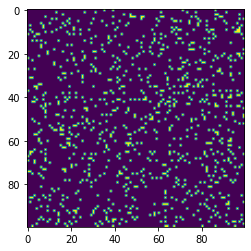

In [ ]:
X = (np.random.rand(100,100)>0.9).astype(int)
import matplotlib.pyplot as plt
plt.imshow(X)

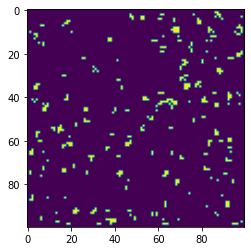

In [ ]:
# count is for each position
count =\
X[:-2,:-2] + X[:-2,1:-1] + X[:-2,2::] +\
X[1:-1,:-2] +              X[1:-1,2:] +\
X[2:,:-2] + X[2:,1:-1] +   X[2:,2:]

# if exactly 3 live neighbors and cell is dead, or if cell is live and 2 or 3 neighbors live, else cell dies
newX = ((count==3) & (X[1:-1,1:-1]==0)) | (((count==3)|(count==2)) & (X[1:-1,1:-1]==1))
X[:]=0
X[1:-1,1:-1] = newX
plt.imshow(X)